In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-prediction-dataset/mobiles_prices_prediction.csv


# **1. Introduction & Approach**
* The Mobile Price Prediction dataset contains mobile phone specifications along with a categorical price_range label (0 = low cost, 3 = very high cost).
* It includes 533 records and 21 features, covering battery power, RAM, internal memory, camera quality, processing capability, network features, and phone dimensions.
* These attributes make the dataset suitable for understanding which factors influence mobile phone pricing, exploring relationships between technical specifications and the final price category.
## **Analysis Approach**
* To explore the dataset and extract meaningful insights, I followed a structured EDA approach:
### **1. Univariate Analysis**
* Examined the distribution of individual variables (e.g., battery_power, RAM, px_height, px_width).
* Identified outliers, skewness, and irrelevant columns.
* Summarized key statistics to understand data ranges, typical values, and variability.
### **2. Bivariate Analysis**
* Explored relationships between each feature and price_range.
* Used pairwise plots, boxplots, and grouped summaries to see how features differ across price categories.
### **3. Multivariate Analysis**
* Studied interactions between multiple variables (RAM + battery + processor features).
* Used correlation heatmaps to identify strong relationships.
* Identified top contributing features jointly influencing price_range.


## **Loading Dataset** 

In [78]:
df = pd.read_csv("/kaggle/input/mobile-price-prediction-dataset/mobiles_prices_prediction.csv")

#  **1. Data Cleaning**

### **Step 1 :**  **Droping Irrelevant Columns (Model URL & Image Url)**
### **Reason To Drop**  : 
These columns are not providing any useful information about mobile specifications and pricing.
                            
**1. Model URL –** This column only contains webpage links for each phone. These links cannot be used in any statistical analysis or visualization and do not describe the device in any way.

**2. Image URL –** This column contains links to product images. Images are not part of the phone’s technical specifications and offer no insight about what affects pricing.                            

### **Code To Drop Irrelevant Columns**

In [79]:
df.drop(columns=['Model URL', 'Image URL'], inplace=True)
df.head()

,Category,Price_PKR,Model_Title,OS,UI,weight_in_g,5G_Band,NFC,Brand,gpu_category,Amoled_display,refresh_rate_hz,storage_gb,ram_gb,main_camera_max_MP,4K_or_More_supportive,front_camer_max_MP,Type_C_supportive,battery_mAh
0,Available,234999,Infinix Zero Flip,14,XOS,195,Yes,Yes,Infinix,Mali,Yes,120,512,8,50,Yes,50,Yes,4720
1,Available,119999,Infinix Note 50 Pro Plus,15,XOS,209,Yes,Yes,Infinix,Mali,Yes,144,256,12,50,Yes,32,Yes,5200
2,Available,99999,Infinix Zero 30 5G,13,XOS,185,Yes,Yes,Infinix,Mali,Yes,144,256,12,108,Yes,50,No,5000
3,Available,99999,Infinix GT 20 Pro,14,XOS,194,Yes,Yes,Infinix,Mali,Yes,144,256,12,108,Yes,32,Yes,5000
4,Available,89999,Infinix Zero 40 5G,14,XOS,195,Yes,Yes,Infinix,Mali,Yes,144,256,12,108,Yes,50,Yes,5000


### **Step 2 :** **Checking for Mising Values**

In [80]:
df.isnull().sum().sort_values(ascending=False)

Category                 0
Amoled_display           0
Type_C_supportive        0
front_camer_max_MP       0
4K_or_More_supportive    0
main_camera_max_MP       0
ram_gb                   0
storage_gb               0
refresh_rate_hz          0
gpu_category             0
Price_PKR                0
Brand                    0
NFC                      0
5G_Band                  0
weight_in_g              0
UI                       0
OS                       0
Model_Title              0
battery_mAh              0
dtype: int64

#### The Dataset have no missing values in any of the columns.

### **Step 3 :** **Checking for Duplicate Rows**

In [81]:
df.duplicated().sum()

0

#### The dataset have no duplicate rows.

### **Checking Data Types**
Correct data types are essential for proper visualization and analysis.
For example, numerical values should not be stored as objects (strings).

In [82]:
# Checking data types of each column
df.dtypes

Category                 object
Price_PKR                 int64
Model_Title              object
OS                        int64
UI                       object
weight_in_g               int64
5G_Band                  object
NFC                      object
Brand                    object
gpu_category             object
Amoled_display           object
refresh_rate_hz           int64
storage_gb                int64
ram_gb                    int64
main_camera_max_MP        int64
4K_or_More_supportive    object
front_camer_max_MP        int64
Type_C_supportive        object
battery_mAh               int64
dtype: object

#### 9 Numerical Columns ->(Price_PKR,OS,weight_in_g,refresh_rate_hz,storage_gb,ram_gb,
#### main_camera_max_MP,front_camer_max_MP,battery_mAh)
#### 10 Object (Categorical Columns) ->(Category,Model_Title,UI,5G_Band,NFC,Brand,gpu_category,
#### Amoled_display,4K_or_More_supportive,Type_C_supportive)

### **Convert categorical features to category type**
This reduces memory and makes processing faster.

In [83]:
# Converting selected object columns to category type
categorical_cols = ['Category','UI','5G_Band','NFC','Brand','gpu_category',
                    'Amoled_display','4K_or_More_supportive','Type_C_supportive']

df[categorical_cols] = df[categorical_cols].astype('category')
df.dtypes

Category                 category
Price_PKR                   int64
Model_Title                object
OS                          int64
UI                       category
weight_in_g                 int64
5G_Band                  category
NFC                      category
Brand                    category
gpu_category             category
Amoled_display           category
refresh_rate_hz             int64
storage_gb                  int64
ram_gb                      int64
main_camera_max_MP          int64
4K_or_More_supportive    category
front_camer_max_MP          int64
Type_C_supportive        category
battery_mAh                 int64
dtype: object

# **2. Univariate analysis**

## **For Nmerical Columns**
### Firstly, we analyze the distribution, central tendency, spread, and outliers for all numeric variables.

### **Importing Necessary Libraries For Ploting**

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## **1. Price_PKR (Target Variable)**

### **Summary Statistics**

In [85]:
df['Price_PKR'].describe()

count       533.000000
mean      86200.656660
std       98758.144155
min       10000.000000
25%       30999.000000
50%       49999.000000
75%       89999.000000
max      654999.000000
Name: Price_PKR, dtype: float64

### **Histogram**

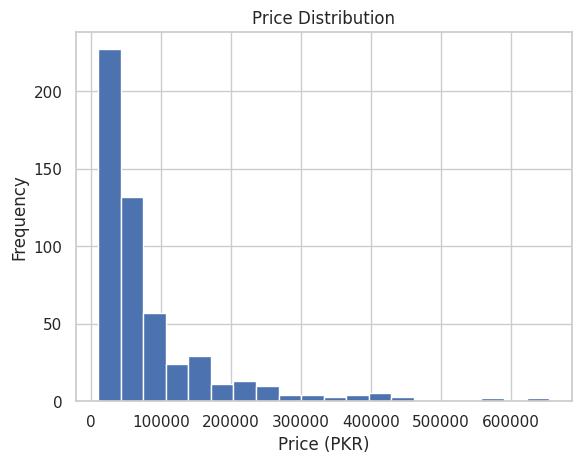

In [86]:
plt.hist(df['Price_PKR'], bins=20)
plt.xlabel("Price (PKR)"); plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

### **Boxplot**

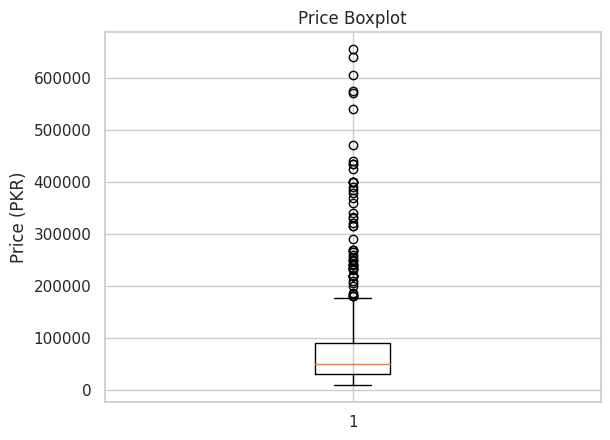

In [87]:
plt.boxplot(df['Price_PKR'])
plt.title("Price Boxplot"); plt.ylabel("Price (PKR)")
plt.show()

### **Price_PKR Column Distribution Shows :**
* Most phones in the dataset are low-priced or mid-priced.
* Only a few phones are very expensive, which creates a long tail on the right side right skewed  (mean > median ).
* This means the market has many affordable phones and only a small number of premium models.
  
### **Overall meaning:**
* The market is dominated by affordable and mid-range phones, with only a few premium flagship devices pushing prices upward.

## **2. Weight (grams)**

### **Summary Statistics**

In [88]:
df['weight_in_g'].describe()

count    533.000000
mean     190.630394
std       19.146850
min       87.000000
25%      184.000000
50%      190.000000
75%      196.000000
max      465.000000
Name: weight_in_g, dtype: float64

### **Histogram**

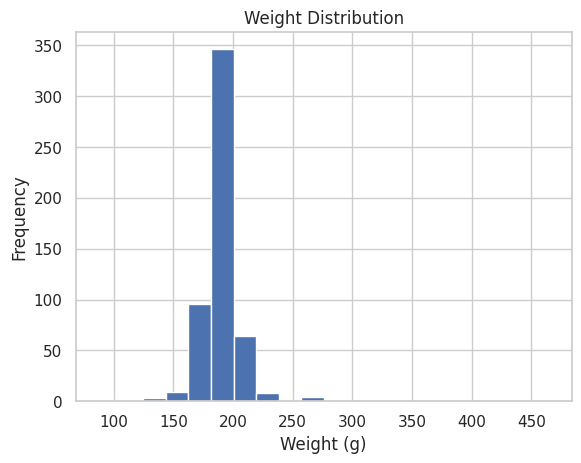

In [89]:
plt.hist(df['weight_in_g'], bins=20)
plt.xlabel("Weight (g)"); plt.ylabel("Frequency")
plt.title("Weight Distribution")
plt.show()

### **Boxplot**

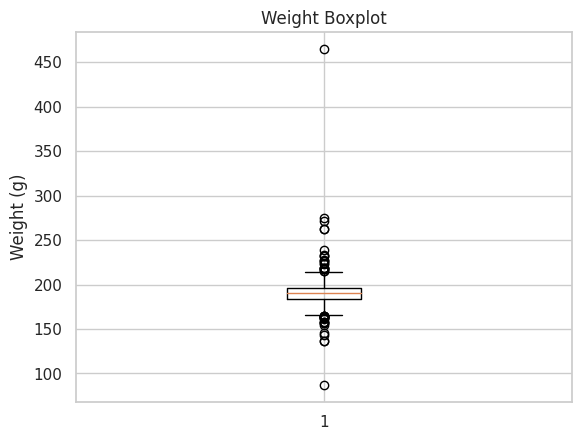

In [90]:
plt.boxplot(df['weight_in_g'])
plt.title("Weight Boxplot"); plt.ylabel("Weight (g)")
plt.show()

### **Weight(Grams) Columns Shows :** 
* Most phones weigh between 180 and 210 grams.
* This shows that brands try to keep their phones within a comfortable weight range.
* There are almost no extremely light or extremely heavy phones.
### **Overall meaning:**
* Manufacturers maintain consistent weights to ensure usability and ergonomic comfort.

## **3. Refresh Rate (Hz)**

### **Summary Statistics**

In [91]:
df['refresh_rate_hz'].describe()

count    533.000000
mean      90.506567
std       27.763882
min       60.000000
25%       60.000000
50%       90.000000
75%      120.000000
max      144.000000
Name: refresh_rate_hz, dtype: float64

### **Histogram**

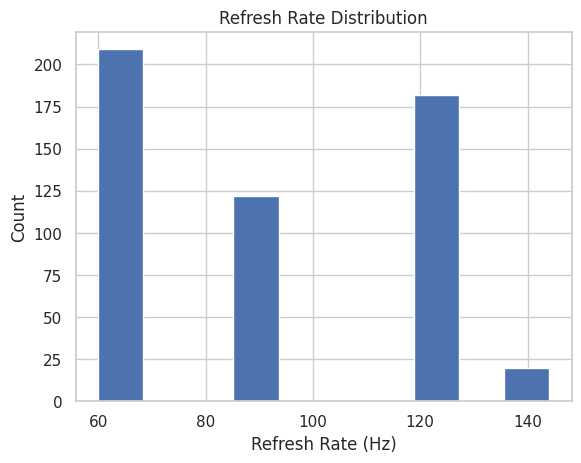

In [92]:
plt.hist(df['refresh_rate_hz'], bins=10)
plt.xlabel("Refresh Rate (Hz)"); plt.ylabel("Count")
plt.title("Refresh Rate Distribution")
plt.show()

### **Refresh Rate (HZ) distriution Shows :** 
* A large number of phones have higher refresh rates like 90 Hz or 120 Hz, meaning smoother screens.
* Only a few phones have very high refresh rates (gaming phones).
* This tells us that smooth screens have become a common feature in modern smartphones.
  
### **Overall meaning:**
* High refresh rate displays are now standard in modern smartphones.

## **4. Storage (GB)**

### **Summary Statistics**

In [93]:
df['storage_gb'].describe()

count    533.000000
mean     176.720450
std      129.068695
min       16.000000
25%      128.000000
50%      128.000000
75%      256.000000
max      512.000000
Name: storage_gb, dtype: float64

### **Histogram**

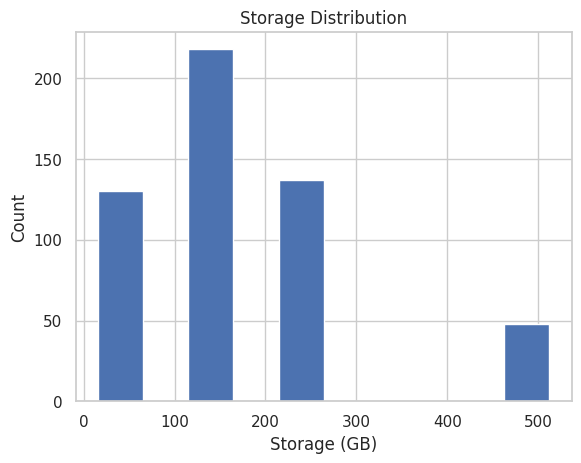

In [94]:
plt.hist(df['storage_gb'], bins=10)
plt.xlabel("Storage (GB)"); plt.ylabel("Count")
plt.title("Storage Distribution")
plt.show()

### **Storage (GB) distribution shows :** 
* 128 GB and 256 GB are the most common storage options.
*  High storage options like 512 GB appear only in premium models.
* This means brands offer enough storage for everyday users while also having options for heavy users.
  
### **Overall meaning:**
* Most phones target mainstream storage needs, while premium devices offer much higher storage.

## **5. RAM (GB)**

### **Summary Statistics**

In [95]:
df['ram_gb'].describe()

count    533.000000
mean       7.037523
std        3.387629
min        1.000000
25%        4.000000
50%        8.000000
75%        8.000000
max       16.000000
Name: ram_gb, dtype: float64

### **Histogram**

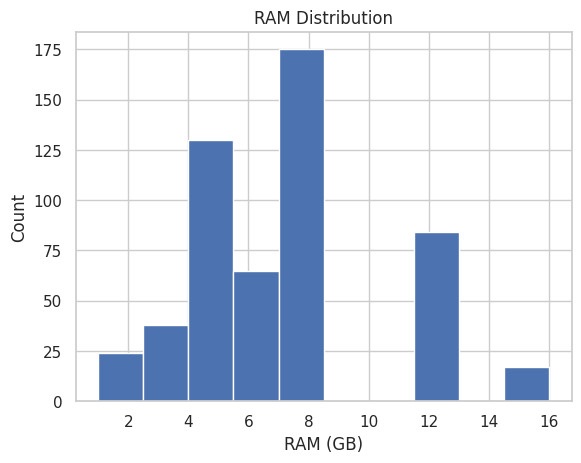

In [96]:
plt.hist(df['ram_gb'], bins=10)
plt.xlabel("RAM (GB)"); plt.ylabel("Count")
plt.title("RAM Distribution")
plt.show()

### **RAM (GB) Distribution Shows :** 
* Most phones offer 8 GB or 12 GB RAM, which is enough for multitasking and gaming.
* A few phones have very high RAM, which are usually gaming or flagship models.
* This shows that RAM is an important selling point for performance.

### **Overall meaning:**
RAM offerings are stable across most models, with higher RAM variations for gaming and flagship devices.

##  **6. Main Camera (MP)**

### **Summary Statistics**

In [97]:
df['main_camera_max_MP'].describe()

count    533.000000
mean      47.960600
std       35.940954
min        8.000000
25%       13.000000
50%       50.000000
75%       50.000000
max      200.000000
Name: main_camera_max_MP, dtype: float64

### **Histogram**

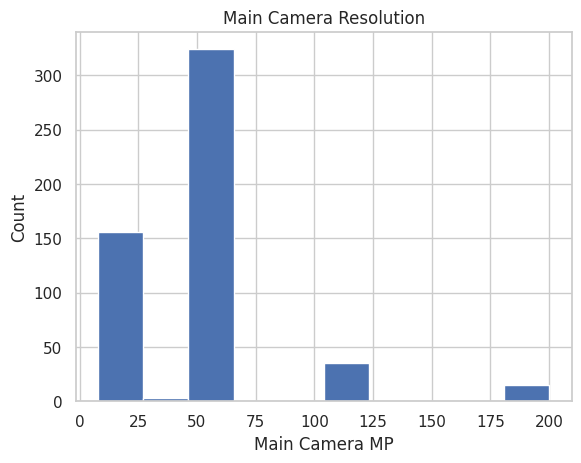

In [98]:
plt.hist(df['main_camera_max_MP'], bins=10)
plt.xlabel("Main Camera MP"); plt.ylabel("Count")
plt.title("Main Camera Resolution")
plt.show()

### **Main Camera (MP) Distribution Shows :** 
* Many phones have 50 MP or 108 MP main cameras — these are popular choices by brands.
* The camera resolutions vary a lot, meaning manufacturers try to offer different levels of camera quality.
* Camera specs are clearly used to attract different types of buyers.

### **Overall meaning:**
* Manufacturers emphasize high-resolution cameras as a key selling point.

## **7. Front Camera (MP)**

### **Summary Statistics**

In [99]:
df['front_camer_max_MP'].describe()

count    533.000000
mean      16.851782
std       12.685265
min        4.000000
25%        8.000000
50%       13.000000
75%       20.000000
max       60.000000
Name: front_camer_max_MP, dtype: float64

### **Histogram**

In [ ]:
plt.hist(df['front_camer_max_MP'], bins=10)
plt.xlabel("Front Camera MP"); plt.ylabel("Count")
plt.title("Front Camera Resolution")
plt.show()

### **Front Camera (MP) Distribution Shows :** 
* Front camera megapixels mostly fall in the medium range.
* Some phones offer higher MP front cameras for better selfies.
* This shows that brands pay attention to selfie quality because users care about it.

### **Overall meaning:**
* Front camera quality is important but usually less extreme than main camera specs.

##  **8. Battery Capacity (mAh)**

### **Summary Statistics**

In [ ]:
df['battery_mAh'].describe()

### **Histogram**

In [ ]:
plt.hist(df['battery_mAh'], bins=10)
plt.xlabel("Battery (mAh)"); plt.ylabel("Count")
plt.title("Battery Capacity Distribution")
plt.show()

### **Battery Capacity (mAh) Distribution Shows :** 
* Most phones have batteries between 4500–5200 mAh.
* This range is common because it lasts a full day for most users.
* Very few phones have unusually small or large batteries.

### **Overall meaning:**
* Manufacturers stick to a standard battery range to ensure full-day usage

## **9 . OS**

### **Summary Statistics**

In [ ]:
df['OS'].value_counts()

### **Bar Chart**

In [ ]:
df['OS'].value_counts().plot(kind='bar')
plt.title("Android Version Distribution")
plt.xlabel("OS Version")
plt.ylabel("Number of Phones")
plt.show()

### **OS Distribution Shows :** 
* Android 11 is the most common OS version (126 phones) in your dataset.
* This shows many devices still ship with slightly older and stable releases.

* Android 14 and Android 15 also appear frequently (77 and 76 phones), indicating that a large portion of new phones are adopting newer operating systems.

* Versions 10, 12, and 13 also have notable counts (each between 56–65), showing that mid-range and older mid-range devices are still widely available on the market.

* Very old versions — Android 6, 7, 8, and 9 — appear rarely, meaning only a few outdated or ultra-budget models still use them.

* The presence of Android 16 (14 phones) suggests that some very new models are included in your dataset.

## **For Categorical Columns**

## **1. Category**

### **Summary Statistics**

In [ ]:
df['Category'].value_counts()

### **Bar Chart**

In [ ]:
df['Category'].value_counts().plot(kind='bar', figsize=(5,4))
plt.title("Category Distribution"); 
plt.xlabel("Category"); plt.ylabel("Count")
plt.show()

### **Category Column Distribution Shows :**

* Most phones are listed as Available, showing the dataset mainly contains currently sold models.

* Only a few phones fall under Upcoming, meaning limited future-release entries.

* The distribution is strongly skewed toward currently active market devices.

### **Overall meaning:**

Insights mostly reflect phones already in the Pakistani market, making analyses relevant for present-day competition.

## **2. Brand**

### **Summary Statistics**

In [ ]:
df['Brand'].value_counts()

### **Bar Chart**

In [ ]:
df['Brand'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title("Brand Distribution"); 
plt.xlabel("Brand"); plt.ylabel("Count")
plt.show()

### **Brand Column Distribution Shows :**

* Some brands have many models, indicating strong market coverage and frequent releases.

* Several brands show fewer models, suggesting selective or premium-focused portfolios.

* Distribution is uneven, highlighting dominant players.

### **Overall meaning:**

* Competition varies significantly across brands — manufacturers with many models heavily influence market pricing and trends.

## **3. UI**

### **Summary Statistics**

In [ ]:
df['UI'].value_counts()

### **Bar Chart**

In [ ]:
df['UI'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title("UI Distribution"); 
plt.xlabel("UI"); plt.ylabel("Count")
plt.show()

### **UI Column Distribution Shows :**

* A few UI skins (MIUI, OneUI, ColorOS, etc.) appear frequently.

* Many UIs show very low counts, forming a long tail.

* Distribution reflects brand-specific software preferences.

### **Overall meaning:**

* The market is dominated by a handful of major UI ecosystems, impacting user experience and updates.

## **4. GPU Category**

### **Summary Statistics**

In [ ]:
df['gpu_category'].value_counts()

### **Bar Chart**

In [ ]:
df['gpu_category'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("GPU Category Distribution"); 
plt.xlabel("GPU Category"); plt.ylabel("Count")
plt.show()

### **GPU Category Column Distribution Shows :**

* A few GPU categories dominate, mainly Adreno and Mali variants.

* Rare GPU options appear minimally in the dataset.

* Strong clustering around common GPUs shows chipset standardization.

### **Overall meaning:**

* Performance levels across the market remain similar because many phones rely on the same GPU families.

## **5. AMOLED Display**

### **Summary Statistics**

In [ ]:
df['Amoled_display'].value_counts()

### **Bar Chart**

In [ ]:
df['Amoled_display'].value_counts().plot(kind='bar', figsize=(5,4))
plt.title("AMOLED Display Distribution"); 
plt.xlabel("AMOLED"); plt.ylabel("Count")
plt.show()

### **Amoled_display Column Distribution Shows :**

* AMOLED displays appear in a large number of phones.

* LCD/non-AMOLED devices form a smaller group.

* Premium display technology is becoming mainstream.

### **Overall meaning:**

* Manufacturers increasingly prioritize display quality, making AMOLED common even in mid-tier devices.

## **6. NFC**

### **Summary Statistics**

In [ ]:
df['NFC'].value_counts()

### **Bar Chart**

In [ ]:
df['NFC'].value_counts().plot(kind='bar', figsize=(5,4))
plt.title("NFC Support Distribution"); 
plt.xlabel("NFC"); plt.ylabel("Count")
plt.show()

### **NFC Column Distribution Shows :**

* Most phones support NFC.

* A smaller but notable portion lack NFC, likely mid- or low-budget models.

* The split reveals feature segmentation across market tiers.

### **Overall meaning:**

* Contactless payments and NFC-based features have become standard, except in the lowest budget category.

## **7. 5G Support (5G_Band)**

### **Summary Statistics**

In [ ]:
df['5G_Band'].value_counts()

### **Bar Chart**

In [ ]:
df['5G_Band'].value_counts().plot(kind='bar', figsize=(5,4))
plt.title("5G Support Distribution"); 
plt.xlabel("5G Support"); plt.ylabel("Count")
plt.show()

### **5G_Band Column Distribution Shows :**

* A large majority of phones support 5G.

* Only a small number remain 4G-only.

* Adoption of 5G is widespread across brands.

### **Overall meaning:**

* The market is now heavily 5G-oriented — future models will likely make 4G obsolete.

## **8. 4K_or_More_supportive**

### **Summary Statistics**

In [ ]:
df['4K_or_More_supportive'].value_counts()

### **Bar Chart**

In [ ]:
df['4K_or_More_supportive'].value_counts().plot(kind='bar', figsize=(5,4))
plt.title("4K+ Video Support Distribution"); 
plt.xlabel("4K Support"); plt.ylabel("Count")
plt.show()

### **4K_or_More_supportive Column Distribution Shows :**

* Many phones support 4K or higher video recording.

* Models without 4K support are usually budget-oriented.

* The feature is becoming more common across mid-range phones.

### **Overall meaning:**

* Camera performance is improving across price ranges — 4K is no longer a flagship-only feature.

##  **9. Type_C_supportive**

### **Summary Statistics**

In [ ]:
df['Type_C_supportive'].value_counts()

### **Bar Chart**

In [ ]:
df['Type_C_supportive'].value_counts().plot(kind='bar', figsize=(5,4))
plt.title("USB Type-C Support Distribution"); 
plt.xlabel("Type-C Support"); plt.ylabel("Count")
plt.show()

### **Type_C_supportive Column Distribution Shows :**

* Almost all phones support USB Type-C.

* Few devices use older micro-USB ports.

* Modern charging standards dominate the dataset.

### **Overall meaning:**

* Type-C is fully established as the default charging interface in modern smartphones.

## **10. Model_Title**

### **Summary Statistics**

In [ ]:
df['Model_Title'].value_counts().head(10)

### **Bar Chart**

In [ ]:
df['Model_Title'].value_counts().head(10).plot(kind='bar', figsize=(8,4))
plt.title("Top 10 Most Common Model Titles"); 
plt.xlabel("Model Title"); plt.ylabel("Count")
plt.show()

# **Questions — Univariate Data**

## **Q1 — What price segment dominates the current smartphone market?**

### **Key Statistics**

In [ ]:
df['Price_PKR'].describe()

### **Visualization — Price Distribution**

In [ ]:
plt.hist(df['Price_PKR'], bins=20)
plt.xlabel("Price (PKR)"); plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

### **Interpretation**

* Most phones fall between 30,000–90,000 PKR, showing strong dominance of mid-range phones.

* The long right tail indicates a small number of premium models, priced above 200,000 PKR.

* This highlights that the Pakistani market is price-sensitive, with consumers preferring value-for-money devices.

* Manufacturers launching new models should focus primarily on mid-range offerings, where the demand is highest.

## **Q2 — Which brands release the most smartphone models, and who leads the market?**

### **Key Statistics**

In [ ]:
df['Brand'].value_counts().head()

### **Visualization — Brand Distribution**

In [ ]:
df['Brand'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title("Brand Distribution"); 
plt.xlabel("Brand"); plt.ylabel("Count")
plt.show()

### Interpretation

* A few brands contribute the majority of models, showing clear market dominance by top manufacturers.

* Brands with large model counts are competing aggressively, releasing frequent updates and variants.

* Brands with fewer models may be targeting premium or focused niches, not mass-market volume.

* This helps marketers identify which competitors have the widest product presence and highest visibility.

## **Q3 — How common are high-quality displays (AMOLED) in modern smartphones?**

### **Key Statistics**

In [ ]:
df['Amoled_display'].value_counts(normalize=True)*100

### **Visualization — AMOLED vs Non-AMOLED**

In [ ]:
df['Amoled_display'].value_counts().plot(kind='bar', figsize=(5,4))
plt.title("AMOLED Display Distribution"); 
plt.xlabel("AMOLED"); plt.ylabel("Count")
plt.show()

### **Interpretation**

* The chart shows that AMOLED screens are more common than LCD, meaning manufacturers prioritize better color and contrast.

* This reflects a shift toward premium visual experience, even in mid-range phones.

* Consumers now expect AMOLED as a default feature rather than a luxury.

* Manufacturers offering non-AMOLED devices risk being seen as outdated unless priced competitively.

## **Q4 — What RAM capacity is most common, and what does it say about performance expectations?**

### **Key Statistics**

In [ ]:
df['ram_gb'].describe()

### **Visualization — RAM Capacity Distribution**

In [ ]:
plt.boxplot(df['ram_gb'])
plt.title("RAM Capacity Boxplot"); plt.ylabel("RAM (GB)")
plt.show()

### **Interpretation**

* Most devices cluster between 6–12 GB RAM, indicating that modern smartphones aim for smooth multitasking.

* A few models have extremely high RAM values (e.g., 16 GB+), forming mild upper outliers.

* Budget devices with 4 GB or less appear far less frequently.

* Manufacturers should see this as a signal: consumers now expect at least 6–8 GB RAM in 2024+ devices.

## **Q5 — Are large batteries now a standard expectation for smartphone users?**

### **Key Statistics**

In [ ]:
df['battery_mAh'].describe()

### **Visualization — Battery Capacity Distribution**

In [ ]:
plt.hist(df['battery_mAh'], bins=15)
plt.xlabel("Battery (mAh)"); plt.ylabel("Frequency")
plt.title("Battery Capacity Distribution")
plt.show()

### **Interpretation**

* A major concentration exists around 5000 mAh, showing it has become the standard battery capacity in modern smartphones.

* Very few phones go below 4000 mAh, reflecting improved consumer expectations for long-lasting power.

* High-capacity models (≥6000 mAh) form small but growing segments targeting heavy users.

* This tells manufacturers that battery life is a key buying factor and must remain a priority.

# **3. Bivariate Analysis**

## **1. Price vs RAM**

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['ram_gb'], df['Price_PKR'], alpha=0.6, s=12)
plt.xlabel("RAM (GB)"); plt.ylabel("Price (PKR)"); plt.title("Price vs RAM")
plt.show()

### **Interpretation:**

* median RAM ≈ 8 GB; higher-RAM phones often have higher price dispersion.

* Scatter shows a weak positive relationship: more RAM tends to appear in pricier phones, but there are many mid-range models with high RAM (variants).

Conclusion: RAM correlates with price but is not the only price driver.

## **2 Price vs Storage**

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['storage_gb'], df['Price_PKR'], alpha=0.6, s=12)
plt.xlabel("Storage (GB)"); plt.ylabel("Price (PKR)"); plt.title("Price vs Storage")
plt.show()

### **Interpretation:**

* Storage shows a clearer pattern: larger storage tiers (256/512 GB) are more common among higher prices.

* Many mid-price phones offer high storage — storage upgrades influence price but are also used to add value in mid-range SKUs.

## **3 Price vs Battery**

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['battery_mAh'], df['Price_PKR'], alpha=0.6, s=12)
plt.xlabel("Battery (mAh)"); plt.ylabel("Price (PKR)"); plt.title("Price vs Battery")
plt.show()

### **Interpretation:**

* Batteries ~4500–5200 mAh appear across all price bands.

* Very large batteries (>6000 mAh) are slightly more common in lower-mid to mid-price segments (value/long-battery models).

* Battery size alone is not a consistent premium indicator.

## 4 Price by Brand (boxplot — top brands only)

In [ ]:
top_brands = df['Brand'].value_counts().head(6).index
df_top = df[df['Brand'].isin(top_brands)]
df_top.boxplot(column='Price_PKR', by='Brand', figsize=(8,4))
plt.suptitle(''); plt.title("Price by Top Brands"); plt.ylabel("Price (PKR)"); plt.show()

### **Interpretation:**

* Median price varies by brand — some brands target higher median price (premium positioning), others low/mid.

* Boxplots show brands with wider price spread (both budget and flagship) vs brands focused narrowly on one segment.

* Useful for competitive positioning.

## **Taking Price as a categorical column:**

In [ ]:
bins=[-1,40000,80000,150000,10**9]
labels=['Low','Mid','High','Premium']
df['price_range']=pd.cut(df['Price_PKR'], bins=bins, labels=labels)
df['price_range'].value_counts()

### **Why I Converted Price into Price Ranges**
* I converted the Price column into price ranges because comparing phones becomes much easier when they are grouped instead of using the raw numbers. The original prices vary a lot, so patterns are harder to see. By dividing the prices into clear segments —

* Low (< 40,000 PKR)

* Mid (40,000–80,000 PKR)

* High (80,000–150,000 PKR)

* Premium (> 150,000 PKR)
it becomes much simpler to understand how different features change across price levels.

## **PRICE RANGE (categorical) comparisons — how features differ across Low / Mid / High / Premium**

## **1 Count of Models by Price Range**

In [ ]:
df['price_range'].value_counts().plot(kind='bar', figsize=(5,4))
plt.title("Count of Models by Price Range")
plt.xlabel("Price Range"); plt.ylabel("Count")
plt.show()

### **Interpretation (Clear & Simple)**

* Most phones fall into the Low and Mid price groups.

* High and Premium segments have comparatively fewer models.

* This shows that the market is mainly focused on budget and mid-range customers, where most sales usually occur.

## **2 RAM Across Price Ranges (Boxplot)**

In [ ]:
df.boxplot(column='ram_gb', by='price_range', figsize=(7,4))
plt.suptitle('')
plt.title("RAM across Price Ranges")
plt.xlabel("Price Range"); plt.ylabel("RAM (GB)")
plt.show()

### **Interpretation**

* Low-range phones commonly offer 4–6 GB RAM.

* Mid-range models usually have 8–12 GB RAM.

* High and Premium devices provide 12 GB and above, often with bigger upper ranges.

* RAM clearly increases as we move to higher price levels, showing it’s a major factor in pricing.

## **3. Main Camera MP Across Price Ranges**

In [ ]:
df.boxplot(column='main_camera_max_MP', by='price_range', figsize=(7,4))
plt.suptitle('')
plt.title("Main Camera MP across Price Ranges")
plt.xlabel("Price Range"); plt.ylabel("Main Camera MP")
plt.show()

### **Interpretation**

* Camera resolution steadily increases from Low → Mid → High → Premium.

* Premium phones show the highest camera MP values with more variety.

* Camera capability is a major premium-level differentiator that pushes price upward.

## **4. AMOLED Share by Price Range**

In [ ]:
pd.crosstab(df['price_range'], df['Amoled_display'], normalize='index').plot(kind='bar', figsize=(7,4))
plt.title("AMOLED Share by Price Range")
plt.xlabel("Price Range"); plt.ylabel("Proportion")
plt.show()

### **Interpretation**

* Low-range phones rarely include AMOLED displays.

* Mid-range models show a mix of AMOLED and non-AMOLED.

* High and Premium phones almost always come with AMOLED screens.

* AMOLED is clearly treated as a premium display technology in the market.

# **FEATURE–FEATURE RELATIONSHIPS**

## **1. RAM vs Storage**

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['ram_gb'], df['storage_gb'], alpha=0.6, s=12)
plt.xlabel("RAM (GB)"); plt.ylabel("Storage (GB)")
plt.title("RAM vs Storage")
plt.show()

### **Interpretation**

* Higher RAM phones generally come with higher storage options.

* Clusters around 8 GB + 128/256 GB and 12 GB + 256/512 GB show typical configurations.

* Manufacturers usually bundle RAM and storage together to create clear model variants.

## **2. Battery vs Weight**

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['battery_mAh'], df['weight_in_g'], alpha=0.6, s=12)
plt.xlabel("Battery (mAh)"); plt.ylabel("Weight (g)")
plt.title("Battery vs Weight")
plt.show()

### **Interpretation**

* Phones with larger batteries tend to weigh more, showing a mild positive trend.

* There are no unusual outliers — the pattern is stable across the dataset.

* Bigger batteries improve usage time but naturally make the phone heavier.

# **Questions — Bivariate Data**

## **Q1.Do higher-RAM phones always cost more, or are there affordable high-RAM options too?**

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['ram_gb'], df['Price_PKR'], alpha=0.6, s=12)
plt.xlabel("RAM (GB)")
plt.ylabel("Price (PKR)")
plt.title("Price vs RAM")
plt.show()

In [ ]:
df.groupby('ram_gb')['Price_PKR'].median()

## **Interpretation**

* Phones with 4–6 GB RAM mostly lie in the low-price range, while 12–16 GB RAM models dominate the high and premium segments.
* But many 8–12 GB RAM phones appear in mid-price ranges, showing that brands offer high RAM even in cheaper models to stay competitive.
* This means RAM alone does not define premium pricing—it's used as a value feature in mid-range phones too.

## **Q2. Which price segment offers the best camera upgrades?**

In [ ]:
df.boxplot(column='main_camera_max_MP', by='price_range', figsize=(7,4))
plt.suptitle('')
plt.title("Main Camera MP across Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Main Camera MP")
plt.show()

## **Key Statistic**

In [ ]:
df.groupby('price_range', observed=True)['main_camera_max_MP'].median()

### **Interpretation**

* Low-range phones rarely include AMOLED screens, while High and Premium phones use AMOLED in the majority of models.
* This shows that AMOLED is still treated as a premium-level display feature.
* For manufacturers, AMOLED helps differentiate higher-end devices and justify a higher price tag.

## **Q4. Do brands follow the same pricing strategy or target different market segments?**

In [ ]:
top_brands = df['Brand'].value_counts().head(6).index
df_top = df[df['Brand'].isin(top_brands)]

df_top.boxplot(column='Price_PKR', by='Brand', figsize=(8,4))
plt.suptitle('')
plt.title("Price by Top Brands")
plt.ylabel("Price (PKR)")
plt.show()

### **Key Statistic**

In [ ]:
df_top.groupby('Brand', observed=True)['Price_PKR'].median()

### **Interpretation**

* Some brands show a low and tight price range, indicating they focus mainly on budget or mid-range markets.
* Other brands have a very wide price spread, offering both budget and flagship models.
* This highlights different brand strategies—some compete on affordability, while others span all segments to capture more customer types.

# **3. Multivariate Analysis**

## **CORRELATION MATRIX (Numerical Features)**

## **Correlation Heatmap**

In [ ]:
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='RdYlBu_r', vmin=-1, vmax=1)
plt.colorbar()

plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        plt.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', fontsize=7)

plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

### Interpretation
* Price_PKR has strong positive correlation with RAM, Storage, Main Camera MP, and Refresh Rate.
→ Higher specs consistently contribute to higher phone prices.

* Battery_mAh has weak correlation with price, meaning battery capacity does not strongly affect pricing.
→ All segments (Low–Premium) offer similar battery sizes.

* RAM and Storage have moderate correlation, showing that brands usually bundle higher RAM with higher storage tiers.

* Battery_mAh and Weight_in_g show moderate correlation, meaning heavier phones usually have larger batteries.

* Overall, the matrix shows that premium pricing is driven by performance and multimedia features (RAM, storage, camera, display refresh rate), not battery capacity.

## **1. Pairplot (multiple numeric features) colored by price_range**

In [ ]:
import warnings
warnings.filterwarnings("ignore")   

# Select the numerical columns directly
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remove price_range if numeric, we only use it as hue
num_cols = num_cols.drop('price_range', errors='ignore')

# Pairplot
sns.pairplot(df[num_cols.tolist() + ['price_range']], 
             hue="price_range",
             diag_kind="kde",
             aspect=1.2)

plt.show()

## **2. Faceted scatter — RAM vs Storage by price_range**

In [ ]:
g = sns.FacetGrid(df, col='price_range', col_order=['Low','Mid','High','Premium'], height=3.2)
g.map(plt.scatter, 'ram_gb', 'storage_gb', alpha=0.6, s=18)
g.set_axis_labels("RAM (GB)", "Storage (GB)"); g.add_legend(); plt.show()

### **Interpretation**
* **Low** shows a tight cluster around lower RAM & storage (e.g., 4–6 GB & 64–128 GB). Mid spreads toward 8–12 GB and 128–256 GB. Premium concentrates at high RAM+storage.

* **Why it matters:** This confirms manufacturers explicitly tier RAM+storage per price segment; mid-range includes overlap because brands use higher memory as a competitive value-add.

* **Action:** To move a model from Mid → High, upgrade both RAM and storage together rather than one alone.

## **3. Faceted regression — Price vs Main Camera MP by price_range (trend lines)**

In [ ]:
sns.lmplot(x='main_camera_max_MP', y='Price_PKR', col='price_range', data=df,
           col_order=['Low','Mid','High','Premium'], height=3.4,
           scatter_kws={'s':10,'alpha':0.5}, line_kws={'linewidth':1})
plt.show()

### **Interpretation**
* **Low segment:** regression line is nearly flat — camera MP does not raise price much in budget phones.

* **Mid→Premium:** regression slopes upward — increasing camera MP is associated with noticeable price increases.

* **Actionable insight:**  Camera upgrades have greater pricing power in Mid/High/Premium tiers; in Low tier, camera MP upgrade alone is unlikely to command higher price.

## **4. Custom — AMOLED proportion by Brand × Price Range**

In [ ]:
top = df['Brand'].value_counts().head(6).index
prop = pd.crosstab(df[df['Brand'].isin(top)]['Brand'], df[df['Brand'].isin(top)]['price_range'],
                   values=df[df['Brand'].isin(top)]['Amoled_display'].eq('Yes').astype(int),
                   aggfunc='mean')
prop.plot(kind='bar', figsize=(9,4)); plt.title("AMOLED proportion by Brand and Price Range"); plt.ylabel("Proportion (Yes)"); plt.show()

### **Interpretation**

* For top brands, Premium columns usually show the highest AMOLED proportions (close to 1.0); some brands push AMOLED into Mid.

* **Why it matters:** Brands that add AMOLED to Mid are using display as a competitive advantage; those who keep AMOLED only in Premium preserve flagship differentiation.

* **Decision tip:** If your brand wants to appear premium without large R&D/SoC changes, adding AMOLED to Mid SKUs can be a visible differentiator.

## **5. Custom — Median Price heatmap by Brand × AMOLED**

In [ ]:
pivot = df.pivot_table(values='Price_PKR', index='Brand', columns='Amoled_display', aggfunc='median')
pivot = pivot.loc[df['Brand'].value_counts().head(8).index]
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu'); plt.title("Median Price by Brand and AMOLED"); plt.show()

### **Interpretation**

* Brands with Yes AMOLED show higher median price than their No counterparts — visible as brighter cells.

* **Implication:** Adding AMOLED is correlated with a higher price point at brand level; marketing can leverage this to justify premium positioning.

## **6. Custom — Violin plot: Main Camera MP by Price Range and AMOLED**

In [ ]:
plt.figure(figsize=(8,4))
sns.violinplot(x='price_range', y='main_camera_max_MP', hue='Amoled_display', data=df, split=True)
plt.title("Camera MP distribution by Price Range and AMOLED"); plt.show()

### **Interpretation**

* Within the Mid and Premium ranges, the AMOLED = Yes violins are shifted slightly higher — AMOLED models tend to pair with better cameras.

**Why:** display and camera upgrades are often bundled as a premium package.

**Recommendation:** If launching a camera-focused phone, bundle AMOLED to signal higher-end quality.

## **7. PCA 2D visualization of core specs colored by price_range**

In [ ]:
from sklearn.decomposition import PCA
X = df[['ram_gb','storage_gb','main_camera_max_MP','battery_mAh']].fillna(0)
pca = PCA(n_components=2).fit_transform(X)
plt.figure(figsize=(7,5))
plt.scatter(pca[:,0], pca[:,1], c=pd.Categorical(df['price_range']).codes, s=18, alpha=0.6)
plt.title("PCA of core specs colored by Price Range"); plt.xlabel("PC1"); plt.ylabel("PC2"); plt.colorbar(ticks=[0,1,2,3]); plt.show()

### **Interpretation** 

* PCA reduces specs into two components; Premium points concentrate in one region (high PC1), separated from Low.

* Meaning: combinations of specs (RAM+storage+camera) — not single features — define market tiers.

* Use: use PCA/components to build compact “tier score” for product comparisons.

## **Questions - Multivariate Analysis**

## **Q1 — How much do features like RAM, storage, battery, and camera combine to separate Premium phones from cheaper ones?**

## **Key Statistics**

In [ ]:
df.groupby('price_range', observed=True)[['ram_gb','storage_gb','main_camera_max_MP','battery_mAh']].median()

## **Visualization — Pairplot**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df[['ram_gb','storage_gb','main_camera_max_MP','battery_mAh','price_range']],
    hue='price_range',
    corner=True,
    height=2.1
)
plt.suptitle("How Core Specs Combine Across Price Ranges", y=1.02)
plt.show()

### **Interpretation**

Premium phones cluster together in the top-right areas of the plots, showing they consistently combine higher RAM, more storage, better cameras, and larger batteries. Lower-priced phones cluster at the opposite side. This visually confirms that pricing comes from a package of multiple stronger features, not a single upgrade.

## **Q2 — Do phones with AMOLED screens also tend to have better cameras within each price range?**

### **Key Statistics**

In [ ]:
df.groupby(['price_range','Amoled_display'], observed=True)['main_camera_max_MP'].median().unstack()

### **Visualization — Violin Plot**

In [ ]:
plt.figure(figsize=(9,4))
sns.violinplot(
    x='price_range', 
    y='main_camera_max_MP', 
    hue='Amoled_display', 
    data=df, 
    split=True
)
plt.title("Camera Quality vs Price Range and AMOLED Display")
plt.xlabel("Price Range")
plt.ylabel("Main Camera (MP)")
plt.show()

### **Interpretation**

Across most price ranges—especially Mid, High, and Premium—phones with AMOLED screens also show higher camera MP distributions. This means manufacturers often pair a better screen with a better camera as a combined upgrade. It signals that AMOLED models are usually positioned as more premium options.

## 1.1. 1.  **Q3 — Which brands rely the most on AMOLED screens when selling premium phones?**

In [ ]:
# Select top brands
top_brands = df['Brand'].value_counts().head(8).index
df_top = df[df['Brand'].isin(top_brands)].copy()

# Ensure groupers are not categorical
df_top['Brand'] = df_top['Brand'].astype(str)
df_top['price_range'] = df_top['price_range'].astype(str)

# Convert AMOLED column to numeric
df_top['amoled_binary'] = df_top['Amoled_display'].apply(lambda x: 1 if x == 'Yes' else 0)

# Create Brand × Price range AMOLED proportion table
am_prop = pd.crosstab(
    df_top['Brand'],
    df_top['price_range'],
    values=df_top['amoled_binary'].astype(float),
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(am_prop, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Proportion of AMOLED Phones Across Brands & Price Ranges")
plt.xlabel("Price Range")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

### **Interpretation**
* Brands differ a lot in how often they use AMOLED screens in each price segment.
* Some brands use AMOLED in almost all Premium phones (close to 1.0), meaning they rely heavily on AMOLED for high–end positioning.
* Other brands only include AMOLED in High or Premium tiers occasionally.

* This helps stakeholders understand which brands push premium display technology most aggressively and who is competing strongly in the premium-display space.

## **Q4 — Which combination of features explains most of the differences between phone price categories?**

### **Visualization — PCA Scatter**

In [ ]:
from sklearn.decomposition import PCA

# Select numeric features for PCA
X = df[['ram_gb','storage_gb','main_camera_max_MP','battery_mAh']].fillna(0)

# Perform PCA
pca_result = PCA(n_components=2).fit_transform(X)

# Create a DataFrame for plotting
pca_data = pd.DataFrame({
    'PC1': pca_result[:,0],
    'PC2': pca_result[:,1],
    'price_range': df['price_range']
})

# Plot PCA
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=pca_data,
    x='PC1',
    y='PC2',
    hue='price_range',
    palette='viridis',
    s=35,
    alpha=0.7
)
plt.title("PCA (2D) of Phone Specifications by Price Range")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Price Range")
plt.tight_layout()
plt.show()

### **Interpretation**
* This PCA plot combines RAM, storage, camera MP, and battery into two new “summary” features (PC1 and PC2).
* Premium phones cluster separately on the right side because they consistently have higher RAM, storage, and camera quality.
* Mid and High phones overlap slightly, showing shared features, while Low-range phones cluster tightly at the bottom-left, meaning they all have similar low specs.
* Overall, the chart shows how groups of features together separate the four price segments.

## Conclusion:
From the full analysis, we found that RAM, storage, and main camera megapixels are the three strongest factors that separate cheaper phones from higher-priced ones. As we move from Low → Mid → High → Premium categories, these three features increase very clearly and consistently across every plot. Battery size also increases with price, but its effect is not as strong as memory and camera quality. Another important finding is that AMOLED display phones are mostly found in higher price ranges, especially when they also have strong camera specs — meaning brands often bundle premium screens with better cameras. Overall, the data shows that phones become “premium” not because of one feature, but because several key features (RAM + storage + camera + AMOLED) improve together as a package.

## Link To the notebook
https://www.kaggle.com/code/nayabnasir20/eda-data-analysis